Strategies for exploring big data:

1. Do it all in spark
1. Sample it, work in memory
1. Aggregate in spark, work in memory

In [44]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.sql.functions import *

from wrangle import wrangle_311

spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle_311(spark)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments


## Working In Spark

We could also visualize the aggregation results with pandas (N.B. this is different than the last section)

How many open and closed cases are there?

In [5]:
pdf = df.groupBy('case_closed').count().toPandas()
pdf

,case_closed,count
0,True,823594
1,False,18110


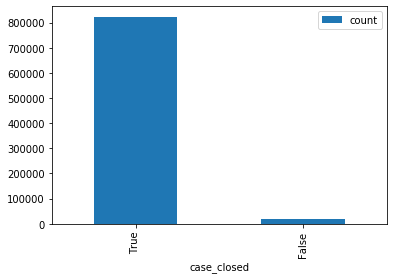

In [8]:
pdf.set_index('case_closed').plot.bar()

How many cases does each department handle?

<Figure size 864x648 with 0 Axes>

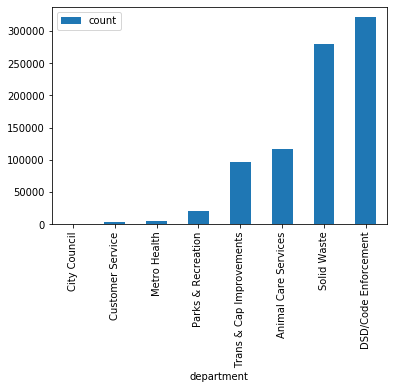

In [14]:
plt.figure(figsize=(12, 9))
df.groupBy('department').count().toPandas().sort_values(by='count').set_index('department').plot.bar()

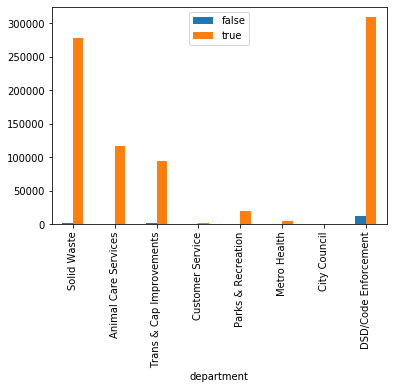

In [22]:
pdf = df.groupBy('department').pivot('case_closed').count().toPandas()
pdf.set_index('department').plot.bar()

In [28]:
plt.rc('font', size=13)

[Text(0.5, 1.0, 'Open Cases')]

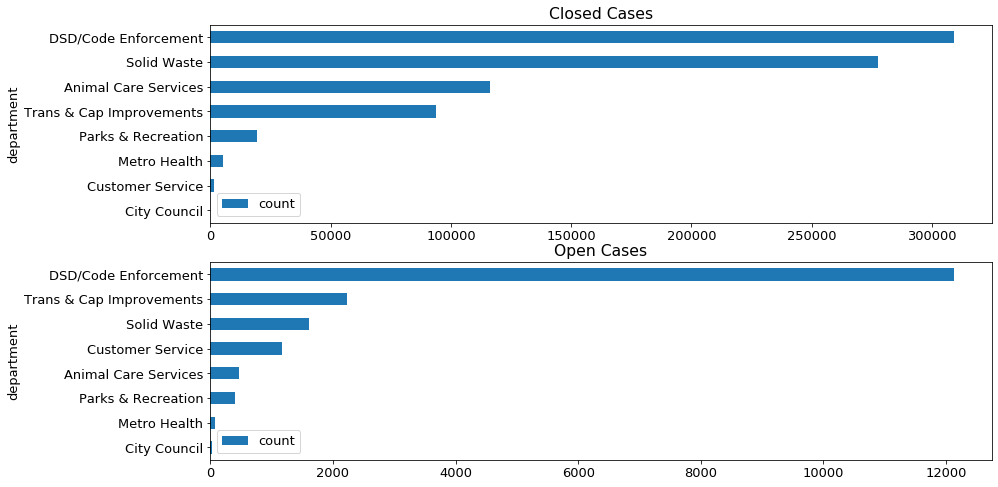

In [32]:
closed_cases = df.filter('case_closed').groupBy('department').count().toPandas()
open_cases = df.filter(expr('! case_closed')).groupBy('department').count().toPandas()

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

closed_cases.set_index('department').sort_values(by='count').plot.barh(ax=ax1)
ax1.set(title='Closed Cases')
open_cases.set_index('department').sort_values(by='count').plot.barh(ax=ax2)
ax2.set(title='Open Cases')

How long is a case open, on average?

## Work With A Sample

In [36]:
sample = df.sample(.01, seed=13).toPandas()

In [40]:
df.sampleBy?

In [37]:
sample

,case_id,case_opened_date,case_closed_date,case_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,source_id,request_address,council_district,num_weeks_late,zipcode,case_age,days_to_closed,case_lifetime,department,dept_subject_to_SLA
0,1014127348,2018-01-01 07:05:00,2018-01-02 15:33:00,2018-01-17 08:30:00,False,-14.706007,True,Front Or Side Yard Parking,16.058646,Closed,svcCRMSS,"834 BARREL POINT, San Antonio, 78251",004,-2.100858,78251,219.0,1.0,1.0,DSD/Code Enforcement,True
1,1014127499,2018-01-01 13:18:00,2018-02-04 12:16:00,2018-01-06 13:18:00,True,28.957257,True,Animal Neglect,5.000000,Closed,ns16326,"717 ALBERT ST, San Antonio, 78207",001,4.136751,78207,219.0,34.0,34.0,Animal Care Services,True
2,1014127512,2018-01-01 13:45:00,2018-01-09 09:58:00,2018-03-07 08:30:00,False,-56.938229,True,Overgrown Yard/Trash,64.781146,Closed,svcCRMSS,RAINBOW DR and CLOUDHAVEN DR,010,-8.134033,,219.0,8.0,8.0,DSD/Code Enforcement,True
3,1014127595,2018-01-01 15:21:00,2018-01-01 15:56:00,2018-03-28 08:30:00,False,-85.690104,True,Signal Timing Modification,85.714537,Closed,139344,EB IH 10 and MARTIN LUTHER,002,-12.241443,,219.0,0.0,0.0,Trans & Cap Improvements,True
4,1014127618,2018-01-01 15:52:00,2018-01-01 20:08:00,2020-09-26 15:52:00,False,-998.822014,True,Stray Animal,999.000000,Closed,139344,"407 ZARZAMORA N, San Antonio, 78207",005,-142.688859,78207,219.0,0.0,0.0,Animal Care Services,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,1014126823,2017-12-31 12:19:00,2018-01-03 11:30:00,2018-01-01 00:19:00,True,2.465648,True,Aggressive Animal(Critical),0.500000,Closed,138810,"7211 MILL VALLEY DR, San Antonio, 78242",004,0.352235,78242,220.0,3.0,3.0,Animal Care Services,True
8443,1014126992,2017-12-31 14:39:00,2018-05-30 11:43:00,2018-06-22 08:30:00,False,-22.865764,True,Traffic Signal New Request,172.743218,Closed,yc16753,DE ZAVALA RD and JV BACON PKWY,008,-3.266538,,220.0,150.0,150.0,Trans & Cap Improvements,True
8444,1014127067,2017-12-31 15:39:00,2018-02-21 20:06:00,2018-01-05 15:39:00,True,47.185255,True,Animal Neglect,5.000000,Closed,138810,"817 STONEWALL AVE, San Antonio, 78211",005,6.740751,78211,220.0,52.0,52.0,Animal Care Services,True
8445,1014127101,2017-12-31 16:00:00,2018-01-04 06:09:00,2018-01-11 08:30:00,False,-7.097662,True,1st Call Bagged Leaves,10.687118,Closed,DS15677,"806 SIMS AVE, San Antonio, 78225",005,-1.013952,78225,220.0,4.0,4.0,Solid Waste,True


In [38]:
sample.corr()

,case_id,case_late,num_days_late,case_closed,SLA_days,num_weeks_late,case_age,days_to_closed,case_lifetime,dept_subject_to_SLA
case_id,1.000000,-0.018453,-0.018421,-0.200390,0.009505,-0.018421,-0.999396,-0.095508,-0.059429,-0.009672
case_late,-0.018453,1.000000,0.149592,-0.126823,-0.090221,0.149592,0.017204,0.375773,0.386224,0.003876
num_days_late,-0.018421,0.149592,1.000000,-0.037296,-0.989003,1.000000,0.018892,0.142879,0.141101,NaN
case_closed,-0.200390,-0.126823,-0.037296,1.000000,-0.001792,-0.037296,0.194158,NaN,-0.335506,0.069873
SLA_days,0.009505,-0.090221,-0.989003,-0.001792,1.000000,-0.989003,-0.010006,-0.009789,-0.001630,NaN
num_weeks_late,-0.018421,0.149592,1.000000,-0.037296,-0.989003,1.000000,0.018892,0.142879,0.141101,NaN
case_age,-0.999396,0.017204,0.018892,0.194158,-0.010006,0.018892,1.000000,0.095262,0.059122,0.009996
days_to_closed,-0.095508,0.375773,0.142879,NaN,-0.009789,0.142879,0.095262,1.000000,1.000000,NaN
case_lifetime,-0.059429,0.386224,0.141101,-0.335506,-0.001630,0.141101,0.059122,1.000000,1.000000,-0.042916
dept_subject_to_SLA,-0.009672,0.003876,NaN,0.069873,NaN,NaN,0.009996,NaN,-0.042916,1.000000


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


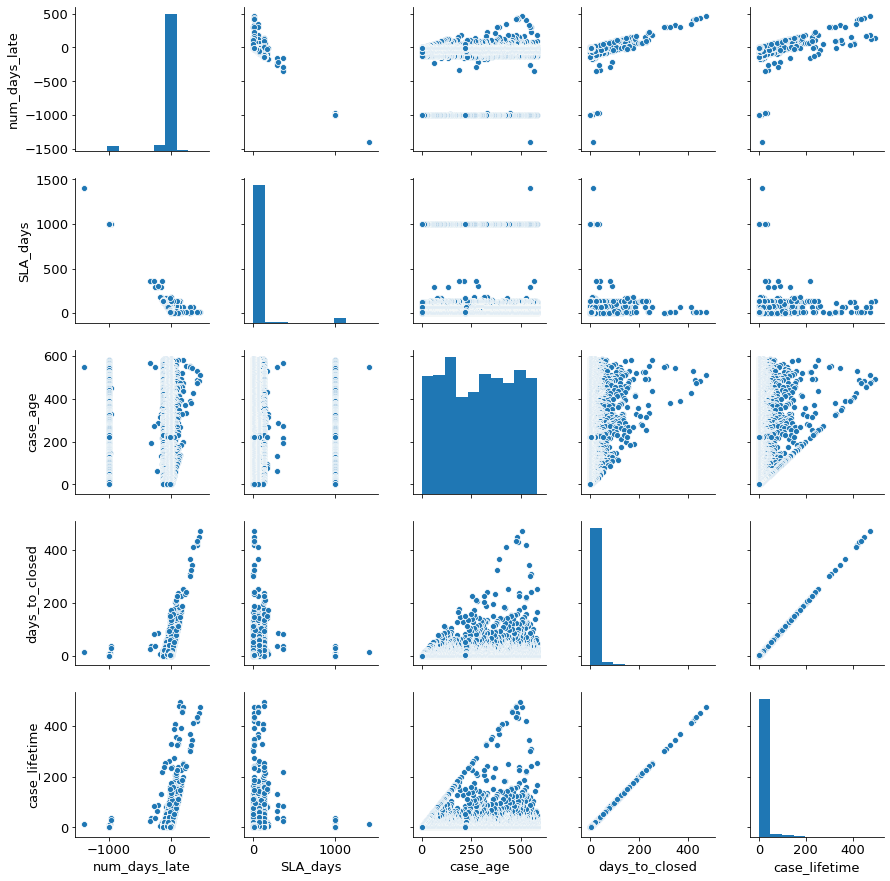

In [39]:
numeric_cols = [
    "num_days_late",
    "SLA_days",
    "case_age",
    "days_to_closed",
    "case_lifetime",
]

sns.pairplot(sample[numeric_cols])

Pairplot the numerics

Explore case lifetimes

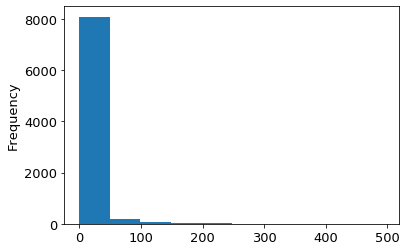

In [42]:
sample.case_lifetime.plot.hist()

Text(0.5, 1.0, 'Distribution of case lifetimes')

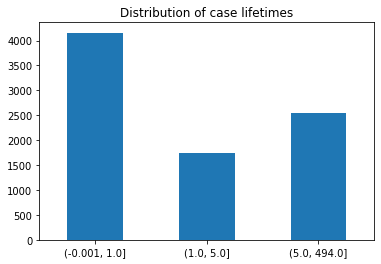

In [54]:
# pd.cut - equal sized bins
# pd.qcut - ~ same number of obs in each bin

pd.qcut(sample.case_lifetime, 3).value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.title('Distribution of case lifetimes')

Text(0.5, 1.0, 'Distribution of Case Lifetimes')

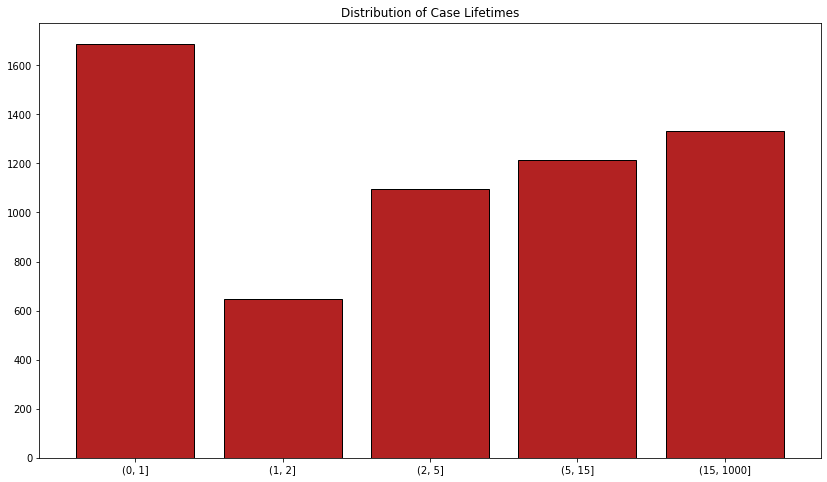

In [66]:
plt.figure(figsize=(14, 8))

bins = [0, 1, 2, 5, 15, 1000]

pd.cut(sample.case_lifetime, bins).value_counts().sort_index().plot.bar(width=.8, ec='black', fc='firebrick')

plt.xticks(rotation=0)
plt.title('Distribution of Case Lifetimes')

## Aggregate, then pass to pandas

In [67]:
cases_by_day = df.select(
    "department",
    date_format("case_opened_date", "yyyy-MM-dd").alias("case_opened_date"),
    date_format("case_closed_date", "yyyy-MM-dd").alias("case_closed_date"),
)

cases_opened_by_day = (
    cases_by_day
    .groupby('case_opened_date')
    .count()
    .na.drop()
    .sort('case_opened_date')
    .toPandas()
    .assign(case_opened_date=lambda df: pd.to_datetime(df.case_opened_date))
    .set_index('case_opened_date')
    ['count']
)
cases_opened_by_day.name = 'cases_opened'

cases_closed_by_day = (
    cases_by_day
    .groupby('case_closed_date')
    .count()
    .na.drop()
    .sort('case_closed_date')
    .toPandas()
    .assign(case_closed_date=lambda df: pd.to_datetime(df.case_closed_date))
    .set_index('case_closed_date')
    ['count']
)
cases_closed_by_day.name = 'cases_closed'

ts = pd.concat([cases_opened_by_day, cases_closed_by_day], axis=1)
ts.head(5)

,cases_opened,cases_closed
2017-01-01,155,67
2017-01-02,1397,385
2017-01-03,1760,734
2017-01-04,1613,1206
2017-01-05,1791,1173


In [81]:
plt.rc('figure', figsize=(17, 8))
plt.rc('font', size=14)

([<matplotlib.axis.XTick at 0x1a2ae6f908>,
 <a list of 20 Text xticklabel objects>)

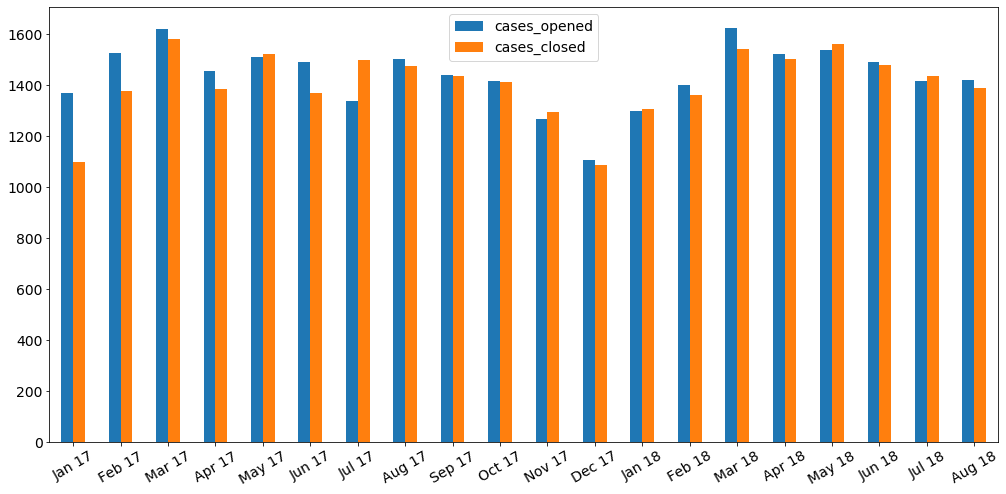

In [83]:
ts.resample('M').mean().plot.bar()

ticks, labels = plt.xticks()
labels = pd.to_datetime([l.get_text() for l in labels]).strftime("%b %y")
plt.xticks(ticks, labels, rotation=30)

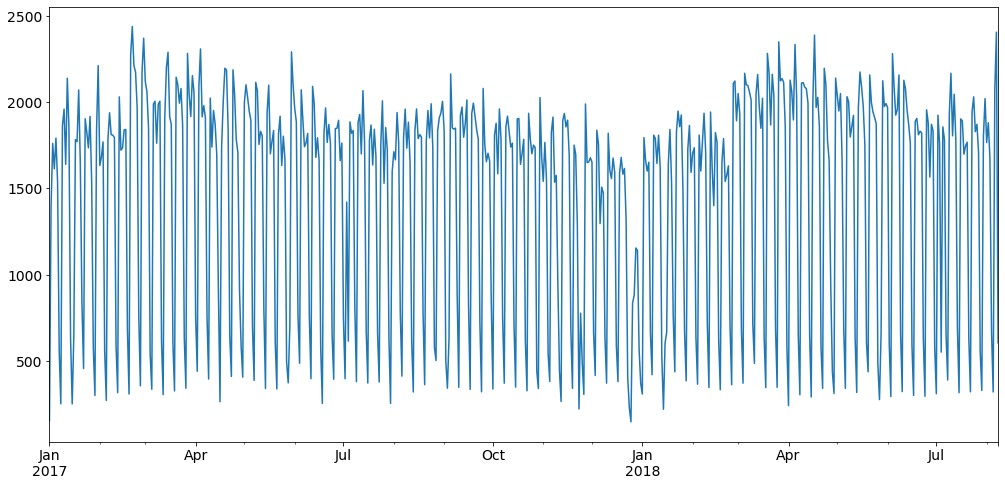

In [86]:
ts.cases_opened.plot()

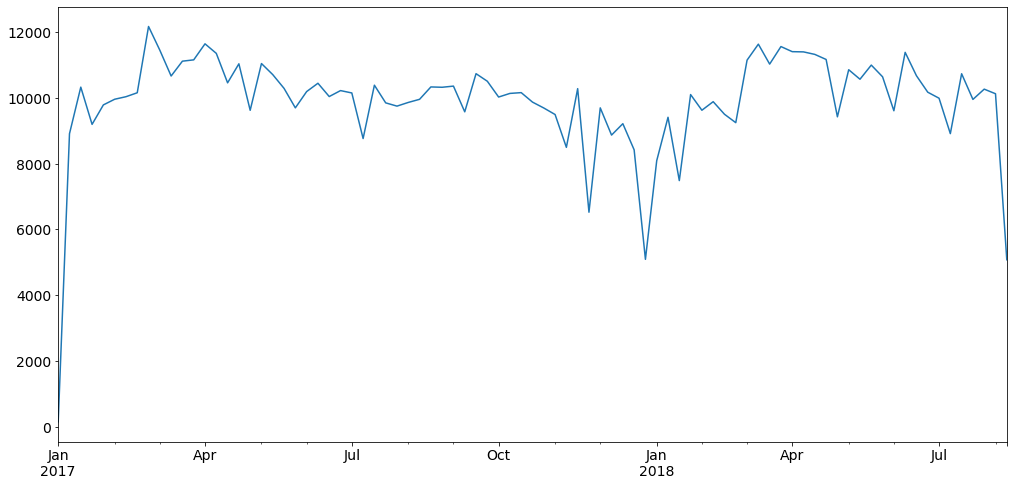

In [87]:
ts.cases_opened.resample('W').sum().plot()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

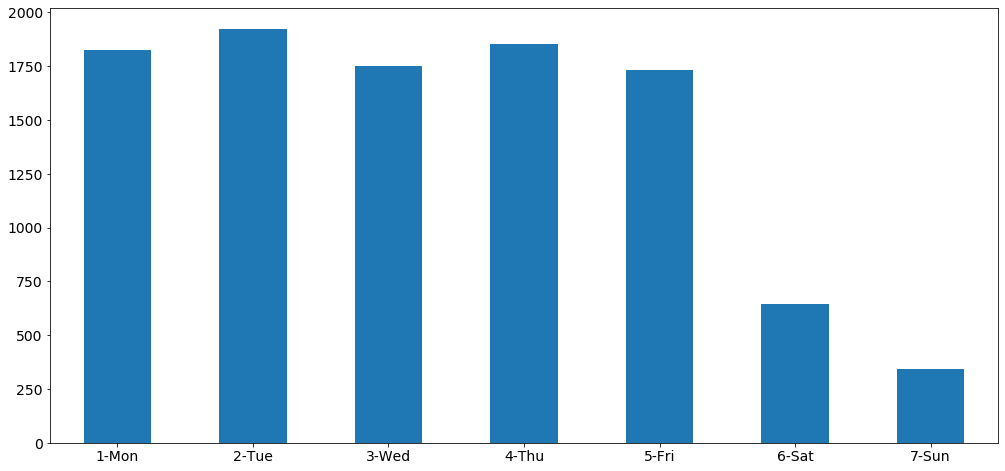

In [95]:
ts.groupby(ts.index.strftime('%u-%a')).cases_opened.mean().plot.bar()
plt.xticks(rotation=0)